# Author: Lauro Cesar Ribeiro

On this project I scraped current Data Analytics job openings from **Indeed.com** in Ireland in May 2021.

- I created a Word Cloud to see the most frequent words for Job Titles, Companies and Location.
= I manipulated data with Pandas to extract insights.
- I cleaned and summarized job descriptions.
- I used Name Entity Recognition to extract keyword from my analysis.

# Import dependencies

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Web Scraper Functions

In [2]:
def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ie.indeed.com/jobs?q={}&l={}'
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url

def get_record(card):
    """Extract job data from a single record"""
    
    job_title = card.h2.a.get('title')
    company = card.find('span', 'company').text.strip()
    job_location = card.find('div', 'recJobLoc').get('data-rc-loc')
    post_date = card.find('span', 'date').text
    today = datetime.today().strftime('%Y-%m-%d')
    summary = card.find('div', 'summary').text.strip().replace('\n', ' ')
    job_url = 'https://ie.indeed.com' + card.h2.a.get('href')

    # this does not exists for all jobs, so handle the exceptions
    salary_tag = card.find('span', 'salaryText')
    if salary_tag:
        salary = salary_tag.text.strip()
    else:
        salary = ''  
        
    record = (job_title, company, job_location, post_date, today, summary, salary, job_url)
    return record

# Choose the Job Title and Location

In [3]:
# Parameters should be get_url("Position", "Location")

records = []
url = get_url("Data Analytics", "Ireland")
    
    # extract the job data
while True:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.find_all('div', 'jobsearch-SerpJobCard')
    for card in cards:
        record = get_record(card)
        records.append(record)
    try:
        url = 'https://ie.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
    except AttributeError:
        break

# Transform it to a Pandas Data Frame

In [4]:
df =pd.DataFrame(records)
df.head()

,0,1,2,3,4,5,6,7
0,Business Intelligence Data Analyst (Fully Remote),Mediahuis,"North Dublin, County Dublin",5 days ago,2021-05-23,Experiencing dealing with interpreting analyti...,,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Intern (Data Science/Data Engineering)- Dublin...,UnitedHealth Group,Dublin,10 days ago,2021-05-23,"Data Engineering; manipulating data with SQL, ...",,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Data Analytics in Supply Chain - Graduate,GE Healthcare,Cork,8 days ago,2021-05-23,Experience of data analytics techniques and st...,,https://ie.indeed.com/rc/clk?jk=c577e7b34bfdcc...
3,Data Scientist (Data & Analytics),Aptiv,Dublin,3 days ago,2021-05-23,Architect hybrid cloud-data lake and data ware...,,https://ie.indeed.com/rc/clk?jk=be81469272e187...
4,"STAFF RESEARCH SCIENTIST, DATA ANALYTICS",Collins Aerospace,Cork,30+ days ago,2021-05-23,Experience on analytics on the edge or applica...,,https://ie.indeed.com/rc/clk?jk=2168e5d0695b86...


### Rename the columns

In [5]:
df.rename(columns = {0:'JobTitle', 
                     1:'Company',
                     2: 'Location',
                     3: 'PostDate',
                     4: 'ExtractDate',
                     5: 'Summary',
                     6: 'Salary',
                     7: 'JobUrl'}, 
            inplace = True)

In [6]:
df.head()

,JobTitle,Company,Location,PostDate,ExtractDate,Summary,Salary,JobUrl
0,Business Intelligence Data Analyst (Fully Remote),Mediahuis,"North Dublin, County Dublin",5 days ago,2021-05-23,Experiencing dealing with interpreting analyti...,,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Intern (Data Science/Data Engineering)- Dublin...,UnitedHealth Group,Dublin,10 days ago,2021-05-23,"Data Engineering; manipulating data with SQL, ...",,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Data Analytics in Supply Chain - Graduate,GE Healthcare,Cork,8 days ago,2021-05-23,Experience of data analytics techniques and st...,,https://ie.indeed.com/rc/clk?jk=c577e7b34bfdcc...
3,Data Scientist (Data & Analytics),Aptiv,Dublin,3 days ago,2021-05-23,Architect hybrid cloud-data lake and data ware...,,https://ie.indeed.com/rc/clk?jk=be81469272e187...
4,"STAFF RESEARCH SCIENTIST, DATA ANALYTICS",Collins Aerospace,Cork,30+ days ago,2021-05-23,Experience on analytics on the edge or applica...,,https://ie.indeed.com/rc/clk?jk=2168e5d0695b86...


In [7]:
#Dataframe Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     851 non-null    object
 1   Company      851 non-null    object
 2   Location     851 non-null    object
 3   PostDate     851 non-null    object
 4   ExtractDate  851 non-null    object
 5   Summary      851 non-null    object
 6   Salary       851 non-null    object
 7   JobUrl       851 non-null    object
dtypes: object(8)
memory usage: 53.3+ KB


In [8]:
# Data Frame is not null

df.isna().sum()

JobTitle       0
Company        0
Location       0
PostDate       0
ExtractDate    0
Summary        0
Salary         0
JobUrl         0
dtype: int64

# Data Visualization

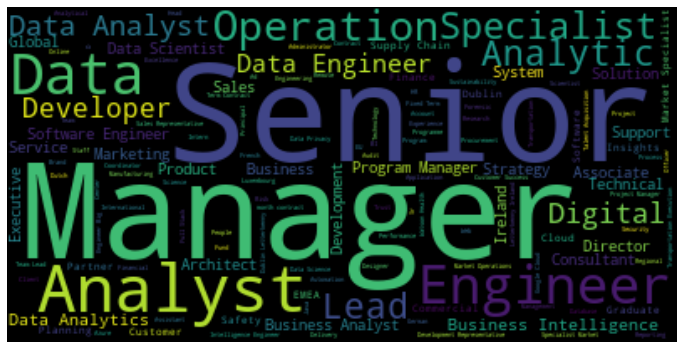

In [9]:
# Job Title

jobtitle = " ".join(title for title in df.JobTitle)

# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(jobtitle)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

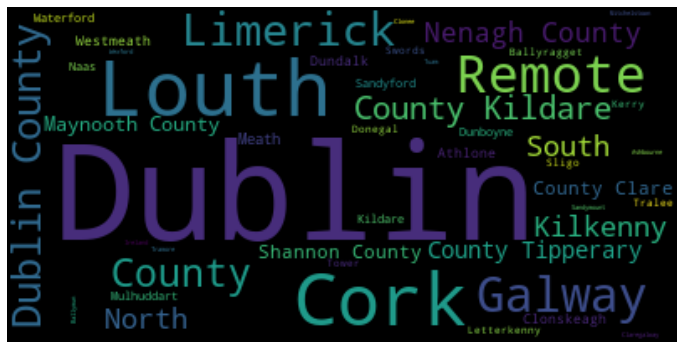

In [10]:
# Location

location = " ".join(title for title in df.Location)

# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(location)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

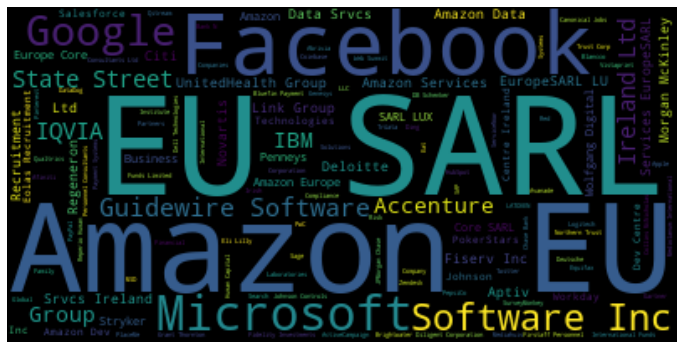

In [11]:
# Company

company = " ".join(title for title in df.Company)

wordcloud = WordCloud(background_color="black").generate(company)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

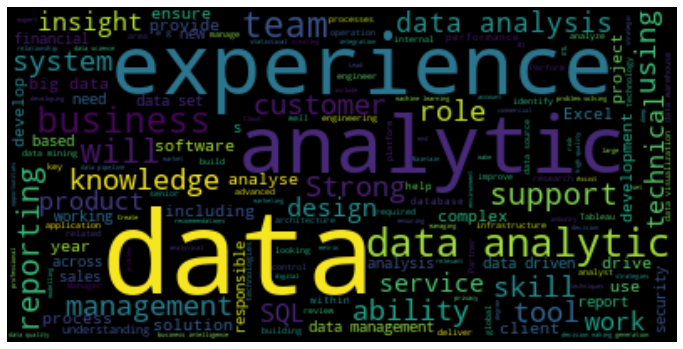

In [12]:
# Summary

summary = " ".join(title for title in df.Summary)

# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(summary)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Job Openinings by Location
df['Location'].value_counts().sort_values(ascending=False).head(20)

Dublin                         531
Louth                           74
Cork                            66
Remote                          32
Galway                          25
Limerick                        24
North Dublin, County Dublin      9
South Dublin, County Dublin      9
Nenagh, County Tipperary         8
Maynooth, County Kildare         8
Kilkenny                         7
Shannon, County Clare            7
Athlone, County Westmeath        4
Clonskeagh, County Dublin        4
Dundalk, County Louth            4
Mulhuddart, County Dublin        3
Kildare                          3
Naas, County Kildare             3
Dunboyne, County Meath           3
Sandyford, County Dublin         3
Name: Location, dtype: int64

In [24]:
# Filtering the most frequent companies to post jobs and where.

df.groupby('Company')['Location'].value_counts().sort_values(ascending=False).head(50)

Company                                 Location                   
Amazon EU SARL                          Louth                          50
Microsoft                               Dublin                         32
Facebook                                Dublin                         32
Google                                  Dublin                         25
Guidewire Software, Inc.                Dublin                         14
IQVIA                                   Dublin                         12
Accenture                               Dublin                         12
UnitedHealth Group                      Dublin                         11
Deloitte                                Dublin                         11
Amazon Services EuropeSARL(LU)          Louth                          11
Citi                                    Dublin                         10
Aptiv                                   Dublin                         10
Novartis                                Dubl

In [25]:
# Filtering Salaries and Location - The majority of Companies do not show salaries on job postings.

df.groupby('Salary')['Location'].value_counts().sort_values(ascending=False).head(50)

Salary                     Location                    
                           Dublin                          502
                           Louth                            74
                           Cork                             63
                           Remote                           30
                           Limerick                         24
                           Galway                           22
                           South Dublin, County Dublin       9
                           Maynooth, County Kildare          8
                           Nenagh, County Tipperary          8
                           Kilkenny                          7
                           Shannon, County Clare             7
                           North Dublin, County Dublin       6
                           Clonskeagh, County Dublin         4
                           Athlone, County Westmeath         4
                           Dunboyne, County Meath            3

# Job Description Summarization

In [16]:
# Tokenizing the text

text = str(df.Summary)
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

In [17]:
# Creating a frequency table to keep the score of each word

freqTable =dict()
for word in words:
    word =word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] +=1
    else:
        freqTable[word]=1

# Creating a dictionary to keep the score of each sentence
sentences = sent_tokenize(text)
sentenceValue = dict()

In [18]:
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq
                
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
    
# Average value of a sentence from the original text

average = int(sumValues / len(sentenceValue))

#Storing sentences into our summary
for sentence in sentences:
    if(sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence

print(summary)

Experiencing dealing with interpreting analytic needs of a business unit. Spec’ing out and quantifying the time needed for ad-hoc analytic requests. Data Engineering; manipulating data with SQL, interacting with REST API’s, analytics front-end development using e.g. NodeJS. Experience of data analytics techniques and statistical methodologies. Ability to provide clear data visualisations. Architect hybrid cloud-data lake and data warehouse for siloed corporate applications. It will involve automated data profiling and monitoring in accordance… Experience on analytics on the edge or applications of data analytics for embedded systems. Research, design and prototype analytics algorithms utilizing data… Proactively research and resolve any data accuracy issues, ensuring transactions are managed in compliance with the transaction documents including the timely… Drive advanced analytics strategy deployment of SAP Analytics Cloud, SAP Data Intelligence, or similar products for advanced analy

# Name Entity Recognition to find Keywords from job descriptions.

In [19]:
nlp = en_core_web_sm.load()

In [20]:
doc = summary

In [21]:
entities = nlp(doc)
len(entities.ents)

728

In [22]:
items = [x.text for x in entities.ents]
Counter(items).most_common(50)

[('SQL', 48),
 ('Excel', 26),
 ('Tableau', 20),
 ('5+ years', 12),
 ('Proven', 12),
 ('BI', 9),
 ('Microsoft', 9),
 ('3+ years', 7),
 ('English', 6),
 ('Data Analytics', 5),
 ('one', 5),
 ('SAS', 5),
 ('Solid', 5),
 ('Supply Chain', 5),
 ('Data Engineering', 4),
 ('2+ years', 4),
 ('Ireland', 4),
 ('Java', 4),
 ('Spark', 4),
 ('Google Analytics', 4),
 ('Lifecycle Safety', 4),
 ('Microsoft AI', 4),
 ('IOPS Management', 4),
 ('R. Improve', 4),
 ('Guidewire', 4),
 ('DOE', 4),
 ('ETL', 4),
 ('Dublin', 4),
 ('Finance', 3),
 ('Apply', 3),
 ('Customer Service', 3),
 ('Bachelor', 3),
 ('Bachelor’s', 3),
 ('100,000', 3),
 ('ActiveCampaign', 3),
 ('850+', 3),
 ('Shopify', 3),
 ('Scala', 3),
 ('Python', 3),
 ('Develop', 3),
 ('Workday', 3),
 ('KPI', 3),
 ('Operations', 3),
 ('Customer Success Specialist', 3),
 ('Microsoft Partners', 3),
 ('CRM', 3),
 ('Gather', 3),
 ('The Fiserv Project Leader', 3),
 ('Data & Analytics', 3),
 ('Grafana and React', 3)]

In [23]:
displacy.render(entities, jupyter=True, style='ent')